In [1]:
import numpy as np 
import matplotlib.pylab as plt 
import utils.helpers as hp

from astropy.io import fits
import os

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

### Band powers and Covariance

In [2]:
# covariance matrix
covmat = hp.load_arrays('data', 'covariance')

# number of data points
ndata = covmat.shape[0]

# we use only the diagonal part
std = np.split(np.sqrt(np.diag(covmat)), 15)

In [3]:
# path of the file name
fname = os.path.join('data/', 'kids_1000.fits')

# load the fits file
data_tables = fits.open(fname)

# we can also get the covariance matrix from the fits file - it is the second diagonal block matrix 
# covariance = data_tables['COVMAT'].data[80:, 80:]

In [4]:
info = np.array([list(data_tables['PeeE'].data[i]) for i in range(ndata)])

In [5]:
info = np.split(info, 15)

### Plot band powers

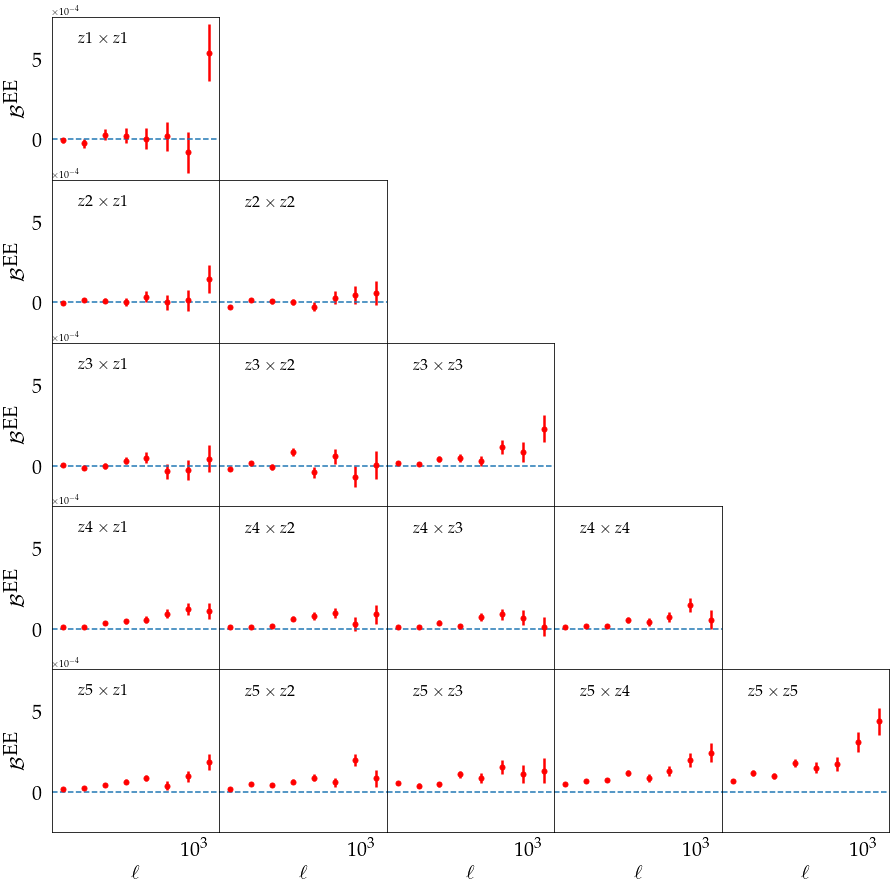

In [6]:
f, ax = plt.subplots(5, 5, sharex=True, sharey = True, figsize = (15, 15))

xLabel = r'$\ell$'
yLabel = r'$\mathcal{B}^{\textrm{EE}}$'

counter = 0

for i in range(5):
    for j in range(i+1):
        
        labz = r'$z'+str(i+1)+'\\times z'+str(j+1)+'$'
        
        ell = info[counter][:,-1]
        bp = info[counter][:,-2]
        sigma = std[counter]
        
        ax[i,j].errorbar(ell, bp, sigma, fmt='ro', ms=5, lw =2.5)
        ax[i,j].set_xlabel(xLabel, fontsize=fontSize)
        ax[i,j].axhline(0, linestyle = '--')
        ax[i,j].set_xlim(99, 1500)
        ax[i,j].set_xscale("log")
        ax[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax[i,j].tick_params(axis = 'both', labelsize = fontSize, pad=10)
        ax[i,j].tick_params(axis='both', which='both', length=0)
        ax[i,j].annotate(labz, xy=(0.3, 0.85), xycoords='axes fraction', fontsize=16, horizontalalignment='center')
        
        if j==0 :
            ax[i,j].set_ylabel(yLabel, fontsize=fontSize)
            
        if j!=i:
            ax[j,i].axis('off')
            
        counter += 1
f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)
# plt.savefig('plots/data_kids_1000.pdf', bbox_inches='tight')
plt.show()

### Plot Covariance Matrix

In [6]:
new_cov = np.zeros((ndata, ndata))

for i in range(ndata):
	for j in range(ndata):
		new_cov[i,j] = covmat[i,j]/np.sqrt(covmat[i,i]*covmat[j,j])

In [7]:
column_labels = []
for i in range(5):
    for j in range(i+1):
        lab = r'$\mathcal{B}^{\textrm{E}\textrm{E}}_{\ell,\,'+str(i+1)+str(j+1)+'}$'
        column_labels.append(lab)

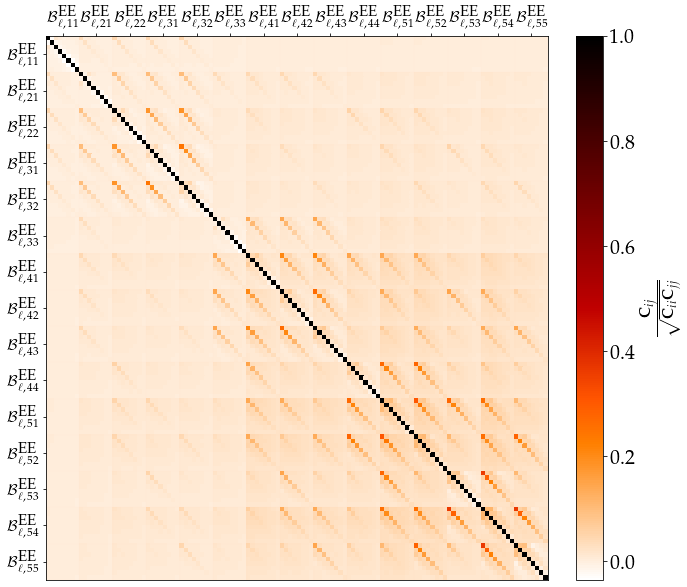

In [12]:
fig, ax = plt.subplots(figsize = (10,10))

heatmap = ax.pcolor(new_cov, cmap=plt.cm.gist_heat.reversed())
cbar = plt.colorbar(heatmap, fraction = 0.05)
cbar.set_label(r'$\frac{\mathbf{C}_{ij}}{\sqrt{\mathbf{C}_{ii}\mathbf{C}_{jj}}}$',size=fontSize)
cbar.ax.tick_params(labelsize=fontSize) 

ax.set_xticks(np.arange(0, ndata, 8) + 4, minor=False)
ax.set_yticks(np.arange(0, ndata, 8) + 4, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()
for i in range(15):
    ax.axhline((i+1)*8, lw = 0.01, c='r')
    ax.axvline((i+1)*8, lw = 0.01, c='r')
ax.set_xticklabels(column_labels, minor=False, fontsize=fontSize-5)
ax.set_yticklabels(column_labels, minor=False, fontsize=fontSize-5)

# plt.savefig('plots/cov_kids_1000.pdf', bbox_inches='tight')

plt.show()